<a href="https://colab.research.google.com/github/VannySothea/Diabetes_Prediction/blob/main/Optimizing_Crop_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [3]:
data = pd.read_csv('/content/agricultural_production_optimization.csv')

In [4]:
data.shape

(2200, 8)

In [5]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [18]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print('-------------------------------------------------')
    print('Statistics for Nitrogen')
    print('Minimum Nitrogen Reguired :', x['N'].min())
    print('Average Nitrogen Required :', x['N'].mean())
    print('Maximum Nitrogen Required :', x['N'].max())
    print('-------------------------------------------------')
    print('Statistics for Phosphorous')
    print('Minimum Phosphorous Reguired :', x['P'].min())
    print('Average Phosphorous Required :', x['P'].mean())
    print('Maximum Phosphorous Required :', x['P'].max())
    print('-------------------------------------------------')
    print('Statistics for Potassium')
    print('Minimum Potassium Reguired :', x['K'].min())
    print('Average Potassium Required :', x['K'].mean())
    print('Maximum Potassium Required :', x['K'].max())
    print('-------------------------------------------------')
    print('Statistics for Temperature')
    print('Minimum Temperature Reguired : (0:.2f)'.format(x['temperature'].min()))
    print('Average Temperature Required : (0:.2f)'.format( x['temperature'].mean()))
    print('Maximum Temperature Required : (0:.2f)'.format( x['temperature'].max()))
    print('-------------------------------------------------')
    print('Statistics for Humidity')
    print('Minimum Humidity Reguired : (0:.2f)'.format(x['humidity'].min()))
    print('Average Humidity Required : (0:.2f)'.format( x['humidity'].mean()))
    print('Maximum Humidity Required : (0:.2f)'.format( x['humidity'].max()))
    print('-------------------------------------------------')
    print('Statistics for PH')
    print('Minimum PH Reguired : (0:.2f)'.format(x['ph'].min()))
    print('Average PH Required : (0:.2f)'.format( x['ph'].mean()))
    print('Maximum PH Required : (0:.2f)'.format( x['ph'].max()))
    print('-------------------------------------------------')
    print('Statistics for Rainfall')
    print('Minimum Rainfall Reguired : (0:.2f)'.format(x['rainfall'].min()))
    print('Average Rainfall Required : (0:.2f)'.format( x['rainfall'].mean()))
    print('Maximum Rainfall Required : (0:.2f)'.format( x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [13]:
@interact
def campare(conditions= ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Average value for', conditions,'is {0:.2f}'.format(data[conditions].mean()))
    print('-------------------------------------------------')
    print('Rice : {0:.2f}'.format(data[(data['label']=='rice')][conditions].mean()))
    print('Black Grams : {0:.2f}'.format(data[(data['label']=='blackgrams')][conditions].mean()))
    print('Banana : {0:.2f}'.format(data[(data['label']=='banana')][conditions].mean()))
    print('Jute : {0:.2f}'.format(data[(data['label']=='jute')][conditions].mean()))
    print('Coconut : {0:.2f}'.format(data[(data['label']=='coconut')][conditions].mean()))
    print('Apple : {0:.2f}'.format(data[(data['label']=='apple')][conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[(data['label']=='papaya')][conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[(data['label']=='muskmelon')][conditions].mean()))
    print('Graps : {0:.2f}'.format(data[(data['label']=='graps')][conditions].mean()))
    print('Watermelon : {0:.2f}'.format(data[(data['label']=='watermelon')][conditions].mean()))
    print('Kidney Beans : {0:.2f}'.format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print('Mung Beans : {0:.2f}'.format(data[(data['label']=='mungbeans')][conditions].mean()))
    print('Oranges : {0:.2f}'.format(data[(data['label']=='orange')][conditions].mean()))
    print('Chick Peas : {0:.2f}'.format(data[(data['label']=='chickpeas')][conditions].mean()))
    print('Lentils : {0:.2f}'.format(data[(data['label']=='lentils')][conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[(data['label']=='cotton')][conditions].mean()))
    print('Maiz : {0:.2f}'.format(data[(data['label']=='maiz')][conditions].mean()))
    print('Moth Beans : {0:.2f}'.format(data[(data['label']=='mothbeans')][conditions].mean()))
    print('Pigeon Peas : {0:.2f}'.format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print('Mango : {0:.2f}'.format(data[(data['label']=='mango')][conditions].mean()))
    print('Pomegranate : {0:.2f}'.format(data[(data['label']=='pomegranate')][conditions].mean()))
    print('Coffee : {0:.2f}'.format(data[(data['label']=='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [14]:
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print('Crops which require greater than average',conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print('-------------------------------------------------')
    print('Crops which require less than average',conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [15]:
print('Crops which require very high Ratio of Nitrogen Content in soil :', data[data['N']>120]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Phosphorous Content in soil :', data[data['P']>100]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Potassium Content in soil :', data[data['K']>200]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Rainfall Content in soil :', data[data['rainfall']>200]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low Temperature :', data[data['temperature']<10]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Temperature :', data[data['temperature']>40]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low HUmidity :', data[data['humidity']<20]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low PH :', data[data['ph']<4]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high PH :', data[data['ph']>9]['label'].unique())

Crops which require very high Ratio of Nitrogen Content in soil : ['cotton']
-------------------------------------------------
Crops which require very high Ratio of Phosphorous Content in soil : ['grapes' 'apple']
-------------------------------------------------
Crops which require very high Ratio of Potassium Content in soil : ['grapes' 'apple']
-------------------------------------------------
Crops which require very high Ratio of Rainfall Content in soil : ['rice' 'papaya' 'coconut']
-------------------------------------------------
Crops which require very low Temperature : ['grapes']
-------------------------------------------------
Crops which require very high Temperature : ['grapes' 'papaya']
-------------------------------------------------
Crops which require very low HUmidity : ['chickpea' 'kidneybeans']
-------------------------------------------------
Crops which require very low PH : ['mothbeans']
-------------------------------------------------
Crops which require ve

In [16]:
print('Summer Season Crops')
print(data[(data['temperature']>30) &(data['humidity']>50)]['label'].unique())
print('-------------------------------------------------')
print('Winter Season Crops')
print(data[(data['temperature']<20) &(data['humidity']>30)]['label'].unique())
print('-------------------------------------------------')
print('Rainy Season Crops')
print(data[(data['rainfall']>200) &(data['humidity']>30)]['label'].unique())

Summer Season Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------
Winter Season Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------
Rainy Season Crops
['rice' 'papaya' 'coconut']


In [17]:
#Removing the label column cause there is no need of label in clustering
x = data.drop(['label'],axis=1)

#Selecting all the values of the data
x = x.values

print(x.shape)

(2200, 7)


In [19]:
# implementing the KMeans algorithm to perform Clustering analysis

km=KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_means = km.fit_predict(x)

#lets find out the Results
a = data['label']
y_means= pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis =1)
z=z.rename(columns = {0: 'cluster'})

In [20]:
#let check the clusters of each Crops
print('Crops in First cluster : ', z[z['cluster']==0]['label'].unique())
print('------------------------------------------------------')
print('Crops in Second cluster : ', z[z['cluster']==1]['label'].unique())
print('------------------------------------------------------')
print('Crops in Third cluster : ', z[z['cluster']==2]['label'].unique())
print('------------------------------------------------------')
print('Crops in Fourth cluster : ', z[z['cluster']==3]['label'].unique())
print('------------------------------------------------------')

Crops in First cluster :  ['grapes' 'apple']
------------------------------------------------------
Crops in Second cluster :  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------
Crops in Third cluster :  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------
Crops in Fourth cluster :  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
------------------------------------------------------


In [21]:
y = data['label']
x = data.drop(['label'], axis = 1)

print('Shape of x: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of x:  (2200, 7)
Shape of Y:  (2200,)


In [27]:
# let create training and testing sets for validation of results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The Shape of x Train: ', x_train.shape)
print('The Shape of x Test: ', x_test.shape)
print('The Shape of y Train: ', y_train.shape)
print('The Shape of y Test: ', y_test.shape)

The Shape of x Train:  (1760, 7)
The Shape of x Test:  (440, 7)
The Shape of y Train:  (1760,)
The Shape of y Train:  (440,)


In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


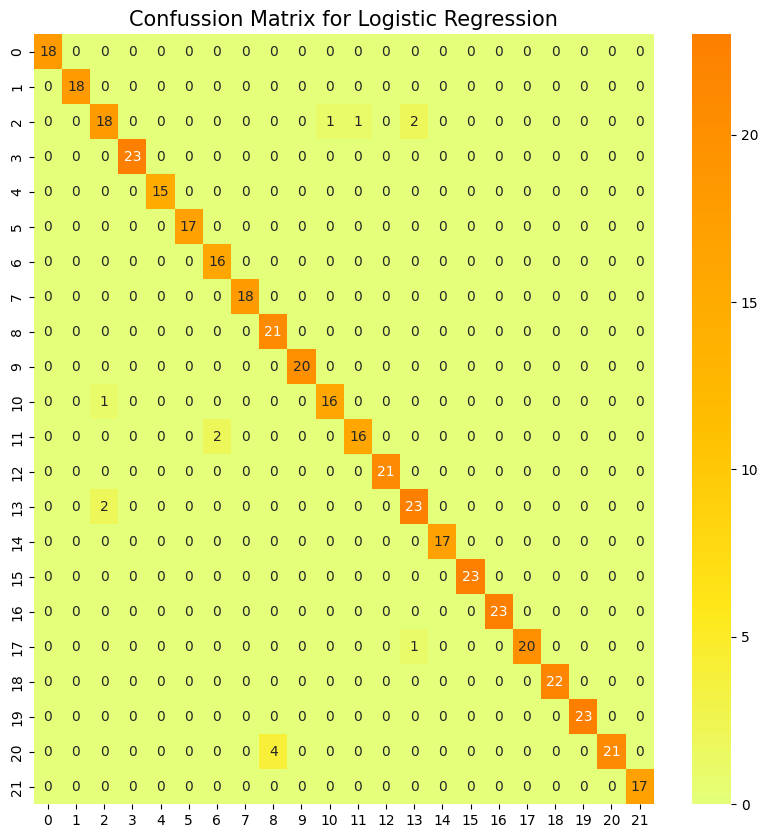

In [30]:
# lets Evalute the Model Performance
plt.rcParams["figure.figsize"]=(10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True, cmap='Wistia')
plt.title('Confussion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [34]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9681818181818181
Precision: 0.9699452867394045
Recall: 0.9681818181818181
F1 Score: 0.9681168080082031


In [45]:
prediction = model.predict(np.array([[50,
                                     100,
                                     200,
                                     20,
                                     20,
                                     7,
                                     200]]))
print('The Suggested Crop for Given Climatic Condition is: ', prediction)

The Suggested Crop for Given Climatic Condition is:  ['chickpea']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
